<a href="https://colab.research.google.com/github/AlphardXyl/Algorithms-of-Foundation-Models/blob/main/testmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import safetensors
from safetensors.torch import load_file, save_file
from safetensors import safe_open

path = '/content/drive/MyDrive/Colab Notebooks/Qwen1.5-0.5B-Chat/model.safetensors'
model1 = load_file(path)

In [ ]:
torch.save(model1, 'test.bin')

In [ ]:
model2 = torch.load("test.bin")

In [ ]:
!pip install optimum[exporters]

In [ ]:
!optimum-cli export onnx --model Qwen/Qwen1.5-0.5B-Chat Qwen_onnx/

In [ ]:
!pip install optimum[exporters-tf]

In [ ]:
!optimum-cli export tflite --model Qwen/Qwen1.5-0.5B-Chat --sequence_length 128 qwen_tflite/

In [ ]:
#!pip install autoawq
#!pip install accelerate
#!pip install bitsandbytes
#import bitsandbytes
#import accelerate

In [1]:
import torch
import torchvision
from transformers import AutoTokenizer, AutoModelForCausalLM

path = '/content/drive/MyDrive/Colab Notebooks/Qwen1.5-0.5B-Chat'
tokenizer = AutoTokenizer.from_pretrained(path)
model = AutoModelForCausalLM.from_pretrained(path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [8]:
device = "cpu"

prompt = "请帮我想一个随机的轮盘，需要八个选项，选项中为性格"
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True
)
model_inputs = tokenizer([text], return_tensors="pt").to(device)

generated_ids = model.generate(
    model_inputs.input_ids,
    max_new_tokens=512
)
generated_ids = [
    output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
]

response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [9]:
response

'这是一个基本的轮盘游戏：\n\n**选择1：**\n- 独立思考\n- 沟通技巧\n- 乐观积极\n- 诚实守信\n- 有耐心\n- 责任心\n- 善于解决问题\n\n**选择2：**\n- 性格温和\n- 冷静分析\n- 团队合作\n- 学会忍耐\n- 尊重他人\n- 忠诚勇敢\n\n**选择3：**\n- 开放接受\n- 适应变化\n- 有好奇心\n- 具备勇气\n- 积极向上\n- 对生活充满热情\n\n**选择4：**\n- 幽默感强\n- 爱好音乐\n- 对艺术感兴趣\n- 充满激情\n- 非常自信\n\n**选择5：**\n- 友好的人\n- 热情的人\n- 多元化的思维\n- 自我实现者\n- 持续学习\n\n**选择6：**\n- 温柔体贴\n- 认真负责\n- 具备同情心\n- 自尊心高\n- 知道如何尊重他人\n\n**选择7：**\n- 创新思维\n- 激发创造力\n- 开阔思路\n- 具有冒险精神\n- 进行自我探索\n\n**选择8：**\n- 高尚的人\n- 有道德标准\n- 真正的朋友\n- 具有领导能力\n- 帮助别人解决问题\n\n以上只是个基本的选择，你可以根据自己的喜好进行修改和扩展。'

In [ ]:
#from transformers import onnx
#!python -m transformers.onnx --help
#!python -m transformers.onnx --model=Qwen/Qwen1.5-0.5B-Chat path
#onnx.convert.export(tokenizer, model, model.config, 21, path)

In [1]:
!pip install diffusers
!pip install accelerate

In [2]:
import torch
from diffusers import (
    StableDiffusionXLPipeline,
    KDPM2AncestralDiscreteScheduler,
    AutoencoderKL
)

# Load VAE component
vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix",
    torch_dtype=torch.float16
)

# Configure the pipeline
pipe = StableDiffusionXLPipeline.from_pretrained(
    "Corcelio/mobius",
    vae=vae,
    torch_dtype=torch.float16
)
pipe.scheduler = KDPM2AncestralDiscreteScheduler.from_config(pipe.scheduler.config)
#pipe.to('cuda')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/671 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
pipe.to('cuda:0')

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.29.0",
  "_name_or_path": "Corcelio/mobius",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "KDPM2AncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [42]:
# Define prompts and generate image
prompt = "Cat jumping on the top of the neon lights and buildings, best quality, cyberpunk"
negative_prompt = "low quality, bad hand shape"

image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    width=1024,
    height=1024,
    guidance_scale=7,
    num_inference_steps=50,
    clip_skip=3
).images[0]


image.save("generated_image.png")

  0%|          | 0/50 [00:00<?, ?it/s]

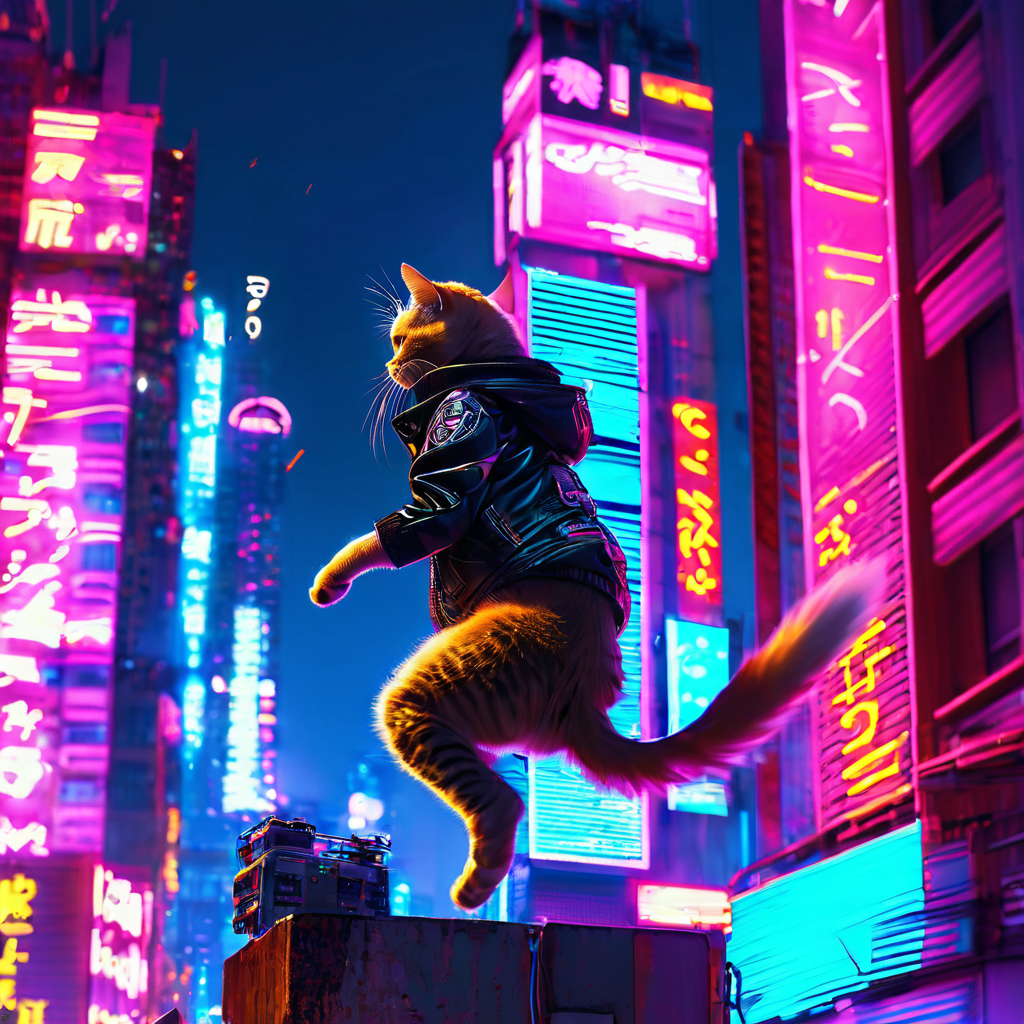

In [43]:
image

In [2]:
from diffusers import DiffusionPipeline
import accelerate

pipeline = DiffusionPipeline.from_pretrained("Crosstyan/BPModel")

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)
text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Crosstyan--BPModel/snapshots/2894eb5f8eb98a4d3283806478de0c648ffb6c38/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Crosstyan--BPModel/snapshots/2894eb5f8eb98a4d3283806478de0c648ffb6c38/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Crosstyan--BPModel/snapshots/2894eb5f8eb98a4d3283806478de0c648ffb6c38/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Crosstyan--BPModel/snapshots/2894eb5f8eb98a4d3283806478de0c648ffb6c38/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [3]:
pipeline.to('cpu')

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.29.0",
  "_name_or_path": "Crosstyan/BPModel",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
prompt = "Cat jumping on the top of the neon lights and buildings, best quality, cyberpunk"
negative_prompt = "low quality, bad hand shape"

image = pipeline(
    prompt,
    negative_prompt=negative_prompt,
    width=1024,
    height=1024,
    guidance_scale=7,
    num_inference_steps=50,
    clip_skip=3
).images[0]


image.save("generated_image.png")

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
image